In [1]:
# https://www.kaggle.com/datasets/dianaddx/aircraft-wildlife-strikes-1990-2023
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Убираем ограничения на кол-во колонок
pd.set_option('display.max_columns', None)

In [2]:
bold = "\033[1m"  # Выделение жирным
normal = "\033[0m"  # Возврат к нормальному тексту

### Описание:
Датасет описывает случаи столкновения с птицами

### Колонки:
- **INCIDENT_DATE**: Дата
- **INCIDENT_MONTH**: Номер месяца
- **INCIDENT_YEAR**: Год
- **TIME**: Время
- **TIME_OF_DAY**: Условия освещения (Время суток)
- **AIRPORT_ID**: ID Аэропорта
- **AIRPORT**: Наименование аэропорта
- **LATITUDE**: Широта
- **LONGITUDE**: Долгота
- **OPERATOR**: Авиакомпания (Оператор ВС)
- **AIRCRAFT**: Модель ВС
- **AC_CLASS**: Тип ВС
- **AC_MASS**: Класс массы ВС
- **TYPE_ENG**: Тип двигателя(й) 
- **NUM_ENGS**: Кол-во двигателей
- **PHASE_OF_FLIGHT**: Этап полета
- **AOS**: Кол-во часов нахождения ВС в нерабочем состоянии
- **COST_REPAIRS**: Стоимость восстановления в USD
- **COST_OTHER**: Оценка прочих расходов в USD. Может включать потерю доходов, расходы на гостиницу в связи с отменой рейса, стоимость слитого топлива и т. д.
- **DAMAGE_LEVEL**: Уровень ущерба
- **SIZE**: Ориентировочный размер птицы со слов пилота. Если было сбито более одного вида, указывается более крупная птица.

In [3]:
columns = ["INCIDENT_DATE", "INCIDENT_MONTH", "INCIDENT_YEAR", "TIME", "TIME_OF_DAY",
           "AIRPORT_ID", "AIRPORT", "LATITUDE", "LONGITUDE", "OPERATOR", "AIRCRAFT",
           "AC_CLASS", "AC_MASS", "TYPE_ENG", "NUM_ENGS", "PHASE_OF_FLIGHT",
           "AOS", "COST_REPAIRS", "COST_OTHER", "DAMAGE_LEVEL", "SIZE"]

In [4]:
df = pd.read_csv("STRIKE_REPORTS.csv")
df = df[columns]
# Уберем 2023 год, так как он не окончен
df = df[df["INCIDENT_YEAR"].astype(str) != "2023"]
df

,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,OPERATOR,AIRCRAFT,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,PHASE_OF_FLIGHT,AOS,COST_REPAIRS,COST_OTHER,DAMAGE_LEVEL,SIZE
0,6/22/1996,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.695420,-121.590770,UNITED AIRLINES,B-737-300,A,4.0,D,2.0,Take-off Run,NaN,NaN,NaN,NaN,Medium
1,6/26/1996,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.858410,-104.667000,UNITED AIRLINES,B-737-300,A,4.0,D,2.0,Take-off Run,NaN,NaN,NaN,NaN,Medium
2,7/1/1996,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.302520,-95.894170,UNITED AIRLINES,B-757-200,A,4.0,D,2.0,Take-off Run,NaN,NaN,NaN,N,Medium
3,7/1/1996,7,1996,NaN,NaN,KIAD,WASHINGTON DULLES INTL ARPT,38.944530,-77.455810,UNITED AIRLINES,A-320,A,4.0,D,2.0,Approach,NaN,NaN,NaN,N,Medium
4,7/1/1996,7,1996,NaN,NaN,KLGA,LA GUARDIA ARPT,40.777240,-73.872610,UNITED AIRLINES,A-320,A,4.0,D,2.0,Climb,NaN,NaN,NaN,M,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288749,4/16/2014,4,2014,16:25,Day,KBOS,GENERAL EDWARD LAWRENCE LOGAN INTL ARPT,42.364350,-71.005180,BUSINESS,DORNIER 328,A,3.0,C,2.0,Approach,NaN,NaN,NaN,NaN,NaN
288750,9/1/2006,9,2006,08:40,Day,KEWR,NEWARK LIBERTY INTL ARPT,40.692500,-74.168660,BUSINESS,DORNIER 328,A,3.0,C,2.0,Taxi,NaN,NaN,NaN,N,Medium
288751,7/24/2014,7,2014,08:40,Day,KELM,ELMIRA/CORNING REGIONAL ARPT,42.159910,-76.891440,BUSINESS,DORNIER 328,A,3.0,C,2.0,Landing Roll,NaN,NaN,NaN,N,Small
288752,11/6/2015,11,2015,15:30,Day,KMVC,MONROE COUNTY ARPT,31.458056,-87.351028,BUSINESS,CITATIONJET,A,2.0,D,2.0,Climb,NaN,NaN,NaN,S,Medium


### Расшифруем некоторые значения

In [5]:
# Расшифровка значений
verbose_values = {"AC_CLASS": {"A": "Airplane",
                               "B": "Helicopter",
                               "C": "Glider",
                               "D": "Balloon",
                               "F": "Dirigible",
                               "I": "Gyroplane",
                               "J": "Ultralight",
                               "Y": "Other",
                               "Z": "Unknown"},
                  "AC_MASS": {1: "<=2,250 kg",
                              2: "2,251-5,700 kg",
                              3: "5,701-27,000 kg",
                              4: "27,001-272,000 kg",
                              5: ">=272,000 kg"},
                  "TYPE_ENG": {"A": "Reciprocating engine (piston)",
                               "B": "Turbojet",
                               "C": "Turboprop",
                               "D": "Turbofan",
                               "E": "None (glider)",
                               "F": "Turboshaft (helicopter)",
                               "Y": "Other"}
                  }

In [6]:
# Заменим UNKNOWN на NaN
df.replace("UNKNOWN", None, inplace=True)
for col, replace_dict in verbose_values.items():
    df[col] = df[col].apply(lambda row: replace_dict.get(row, row))

### Приведение типов

Это необходимо сделать не только для правильной работы с переменными, но и для сокращения размера

In [7]:
import sys
from typing import Any


def get_size(obj: Any) -> str:
    """
    Возвращает человеко-читаемый размер объекта.

    Parameters:
    - obj: любой объект

    Returns:
    - str: строка с человеко-читаемым размером объекта
    """
    size = sys.getsizeof(obj)
    for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
        if size < 1024.0:
            return size, f"{size:.1f} {unit}"
        size /= 1024.0

In [8]:
size_before, size_before_txt = get_size(df)
print(f"Размер {bold}ДО{normal} приведения к типам: {bold}{size_before_txt}{normal}")

Размер ДО приведения к типам: 228.7 MB


In [9]:
int_columns = ["NUM_ENGS", "INCIDENT_MONTH", "INCIDENT_YEAR"]
float_columns = ["LATITUDE", "LONGITUDE", "COST_REPAIRS", "COST_OTHER", "AOS"]
categorical_columns = ["INCIDENT_MONTH", "INCIDENT_YEAR", "TIME_OF_DAY",
                       "AIRPORT_ID", "AIRPORT", "OPERATOR", "AIRCRAFT",
                       "AC_CLASS", "AC_MASS", "TYPE_ENG", "PHASE_OF_FLIGHT",
                       "SIZE"]

In [10]:
def clean_cost_repairs(row):
    if isinstance(row, str):
        row = row.replace(",", "")
        return row


cols = ['COST_REPAIRS', "COST_OTHER"]
df[cols] = df[cols].applymap(clean_cost_repairs)

In [11]:
# Распарсим дату
df['INCIDENT_DATE'] = pd.to_datetime(df['INCIDENT_DATE'], format='%m/%d/%Y')
df[int_columns] = df[int_columns].astype("Int64")  # Этот специальный тип необходим для поддержки NaN в int-ах
df[float_columns] = df[float_columns].astype(float)
df[categorical_columns] = df[categorical_columns].astype("category")

In [12]:
size_after, size_after_txt = get_size(df)
print(f"Размер {bold}ПОСЛЕ{normal} приведения к типам: {bold}{size_after_txt}{normal}")
percent = 100 - size_after / size_before * 100
print(f"Сокращение размера на {bold}{percent:.2f}%{normal}")

Размер ПОСЛЕ приведения к типам: 47.8 MB
Сокращение размера на 79.11%


### Посмотрим на карту инцедентов
По ней видно, что больше всего случаев происходит в северной америке <br>
Вероятно, это связанно с развитой экономикой США, и как следствием, существенно бОльшим количеством полетов по сравнению с другими странами

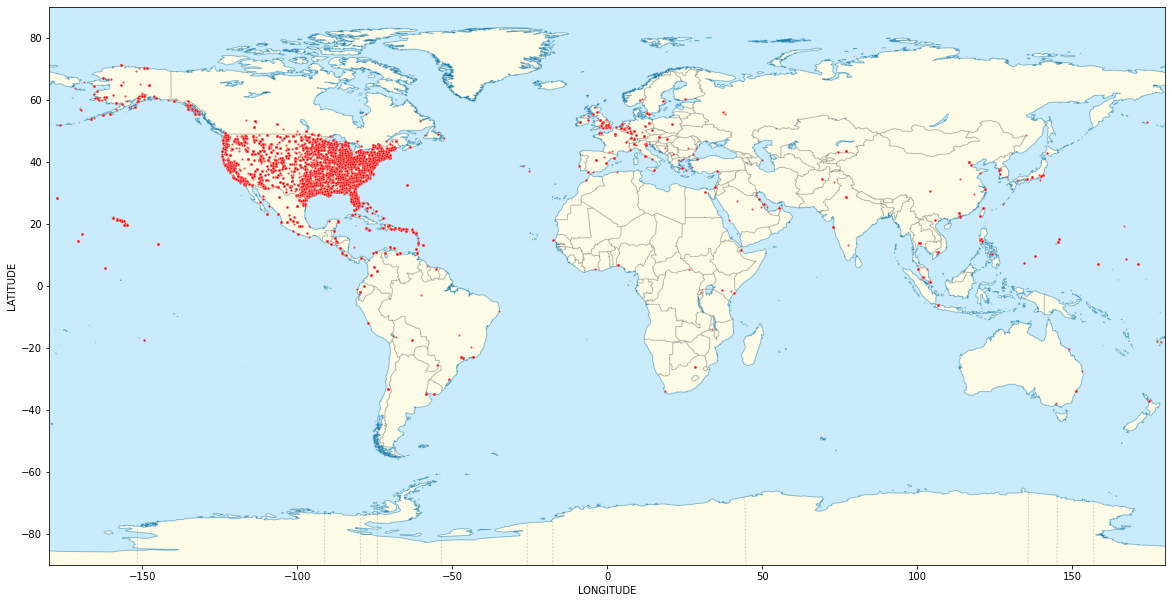

In [13]:
planet_image_path = 'planet.png'
planet_img = plt.imread(planet_image_path)

plt.figure(figsize=(20, 15))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=df, s=5, alpha=0.7, color='red')
plt.imshow(planet_img, extent=[-180, 180, -90, 90])

plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show();

### Кол-во событий по годам
Можем увидеть, что в 2020 году идет существенное снижение, вероятно, это связанно с COVID 19

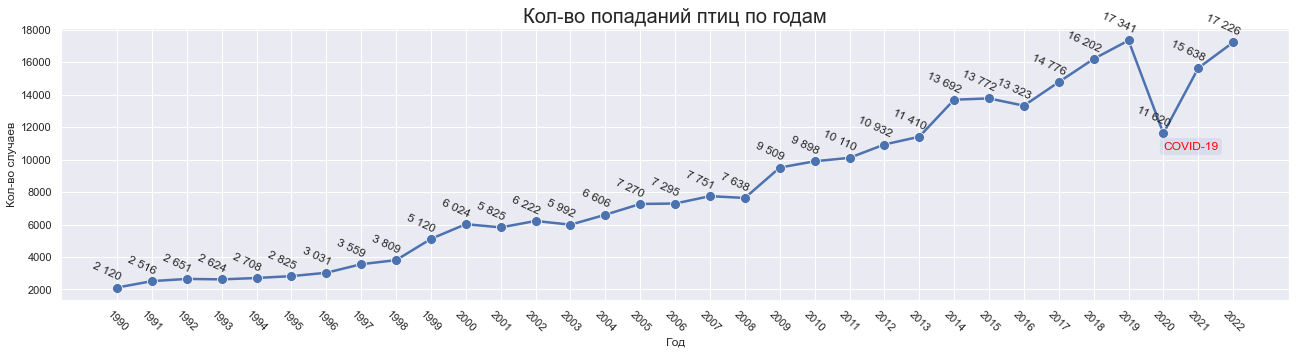

In [14]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(22, 5))
column = "INCIDENT_YEAR"
data = (df[[column]]
        .reset_index()
        .groupby(column)
        .agg("count"))
plot = sns.lineplot(data=data,
                    linewidth=2.5,
                    legend=False,
                    marker='o',
                    markersize=10,
                    color="red")
plot.set_title("Кол-во попаданий птиц по годам",
               fontdict={"fontsize": 20})
plot.set_xlabel('Год')
plot.set_ylabel('Кол-во случаев')
plt.xticks(data.index.to_list(), rotation=-45)
plt.annotate("COVID-19",
             xy=(2020, data.loc[2020][0] - 1000),
             xycoords='data',
             bbox={"boxstyle": "round", "alpha": .1},
             color="red");

for year, count in data.iterrows():
    value = f"{int(count['index']):,}".replace(",", " ")
    plt.annotate(value,
                 xy=(year, count),
                 xytext=(-10, 5),
                 textcoords='offset points',
                 rotation=-25,
                 ha='center',
                 va='bottom')

### Количество случаев по типам двигателей
Больше всего приходится на турбовентиляторные двигатели, вероятно связанно с тем, что их просто в целом больше

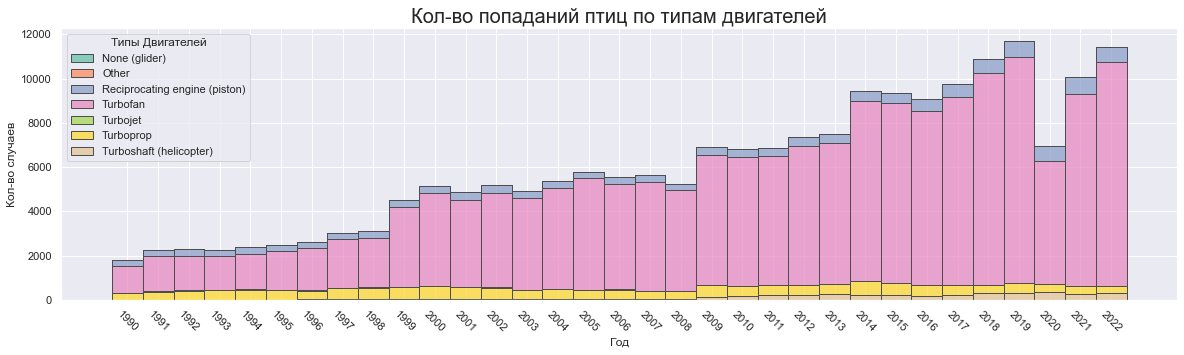

In [15]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20, 5))
palette = sns.color_palette("Set2", 7)
column = "TYPE_ENG"
data = df[df[column].notna()].reset_index()
plot = sns.histplot(data=data,
                    x="INCIDENT_YEAR",
                    hue=column,
                    multiple="stack",
                    edgecolor=".3",
                    palette=palette,
                    log_scale=False)
plot.set_title("Кол-во попаданий птиц по типам двигателей",
               fontdict={"fontsize": 20})
plot.set_xlabel('Год')
plot.set_ylabel('Кол-во случаев')
plot.legend_.set_title("Типы Двигателей")
plt.xticks(sorted(data["INCIDENT_YEAR"].unique()), rotation=-45);

### Распределение случаев по типам ВС
Как и ожидалось, самым массовым будет самолет, так как их в целом больше

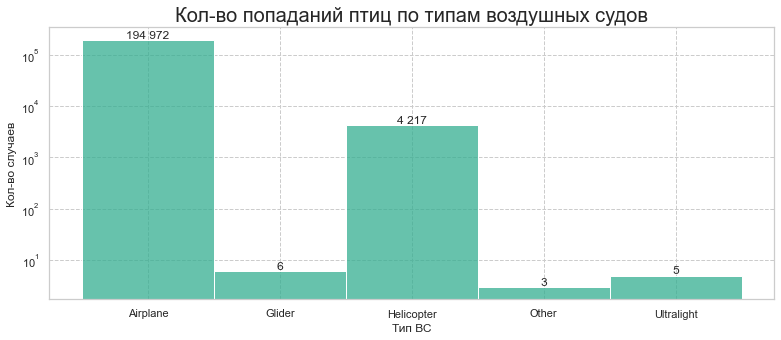

In [16]:
plt.figure(figsize=(13, 5))
column = "AC_CLASS"
columns = [column, "INCIDENT_YEAR"]
data = df[df[column].notna()][column]

sns.set(style="whitegrid",
        rc={'grid.linestyle': '--'})

plot = sns.histplot(data=data,
                    log_scale=(False, True),
                    color="#34ae91")
plot.set_title("Кол-во попаданий птиц по типам воздушных судов",
               fontdict={"fontsize": 20})
plot.set_xlabel('Тип ВС')
plot.set_ylabel('Кол-во случаев')

for p in plot.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    value = f'{int(p.get_height()):,}'.replace(",", " ")
    plot.annotate(value, (x, y),
                  ha='center',
                  va='center',
                  xytext=(0, 5),
                  textcoords='offset points');

### Посмотрим числовые переменные

In [17]:
_df_nums = df.drop(["LATITUDE", "LONGITUDE"], axis=1)
num_columns = ["NUM_ENGS", "AOS", "COST_REPAIRS", "COST_OTHER"]
_df_nums = _df_nums.dropna(subset=num_columns)

#### Через матрицу корреляции (коэфф. Пирсона)
По всем соотношениям взаимосвязь **слабая**

In [18]:
def make_correlation_matrix(_df: pd.DataFrame):
    """Визуализирует матрицу корреляции"""
    plt.figure(figsize=(10, 8))
    correlation_matrix = _df.corr()
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='coolwarm',
                fmt=".2f",
                linewidths=.5)
    plt.title('Матрица корреляции',
              fontdict={"fontsize": 20})

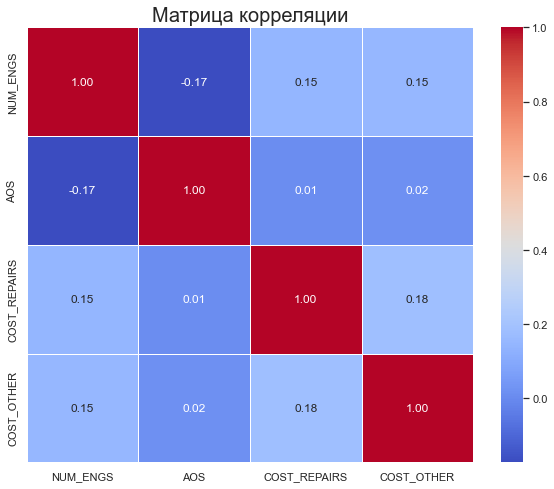

In [19]:
make_correlation_matrix(_df_nums)

#### Посмотрим на распределение расходов на ремонт

In [20]:
def make_boxplot(_df: pd.DataFrame):
    """Построение Boxplot"""
    plt.figure(figsize=(10, 6))
    ax = sns.boxenplot(data=_df,
                       palette=sns.color_palette("Set2"))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'.replace(",", " ")))
    plt.title("Распределение расходов на ремонт",
              fontdict={"fontsize": 20})
    plt.xlabel("Вид расходов")
    plt.show()


def make_violinplot(_df: pd.DataFrame):
    """Построение Violinplot"""
    plt.figure(figsize=(10, 6))
    ax = sns.violinplot(data=_df,
                        inner="quart",
                        palette=sns.color_palette("Set2"))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'.replace(",", " ")))
    plt.title('Распределение расходов на ремонт',
              fontdict={"fontsize": 20})
    plt.xlabel("Вид расходов")
    plt.show()

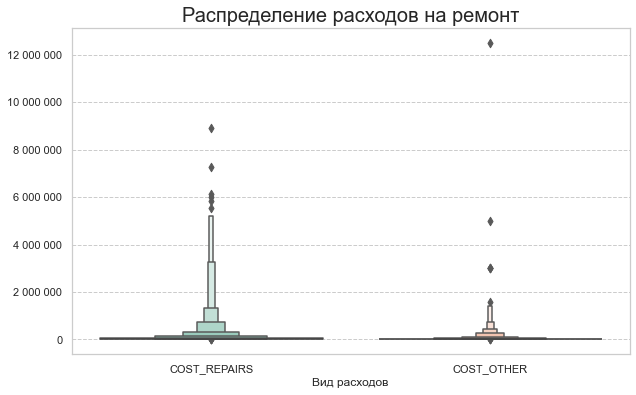

In [21]:
make_boxplot(_df_nums[["COST_REPAIRS", "COST_OTHER"]])

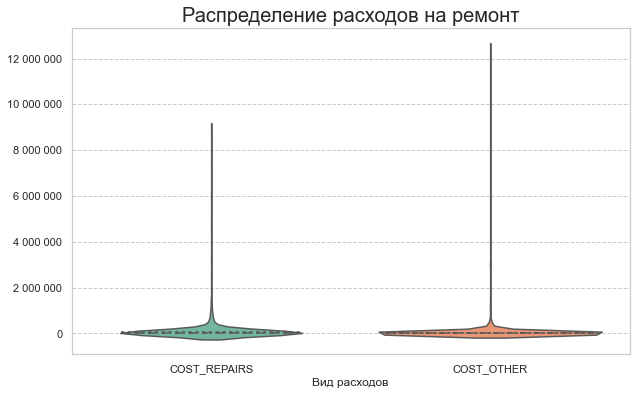

In [22]:
make_violinplot(_df_nums[["COST_REPAIRS", "COST_OTHER"]])

##### Попробуем удалить выбросы в колонках по затратам
Сделаем это у COST_REPAIRS, что бы отрезать меньше <br>
Отрежем **4-й квартиль (75-й квантиль)**

In [23]:
_df_nums_2 = _df_nums[_df_nums['COST_REPAIRS'] <= _df_nums['COST_REPAIRS'].quantile(.75)]

##### Снова посмотрим на ящик с усами

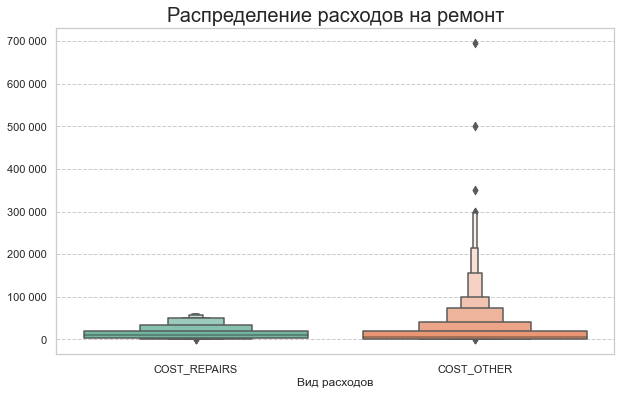

In [24]:
make_boxplot(_df_nums_2[["COST_REPAIRS", "COST_OTHER"]])

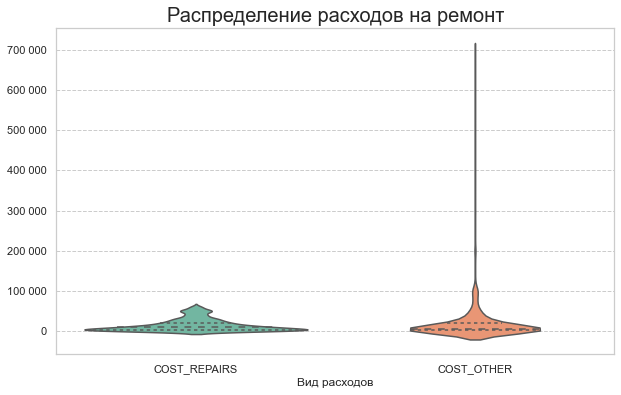

In [25]:
make_violinplot(_df_nums_2[["COST_REPAIRS", "COST_OTHER"]])

##### И снова на корреляцию
Увеличиалсь связь между нашими переменными **COST_*** но это не то что нам могло бы быть интересно

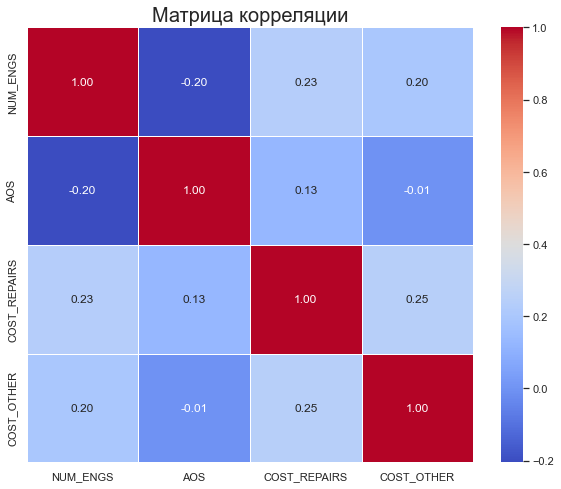

In [26]:
make_correlation_matrix(_df_nums_2)

##### Попробуем удалить выбросы и по второй колонке COST_OTHER
Сделаем это у COST_REPAIRS, что бы отрезать меньше <br>
Отрежем так же, **4-й квартиль (75-й квантиль)**

In [27]:
_df_nums_3 = _df_nums[(_df_nums['COST_REPAIRS'] <= _df_nums['COST_REPAIRS'].quantile(.75)) &
                      ((_df_nums['COST_OTHER'] <= _df_nums['COST_OTHER'].quantile(.75)))]

##### Ящик с усами выглядит еще лучше

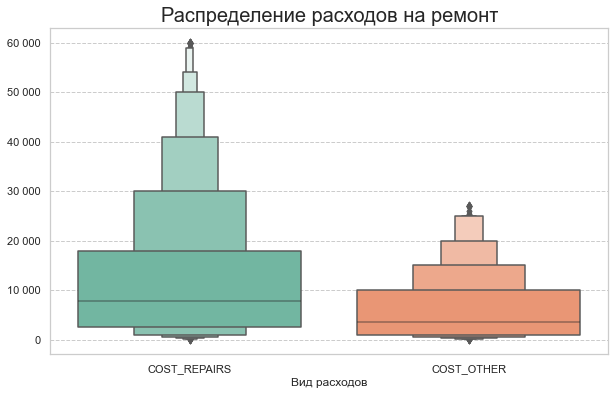

In [28]:
make_boxplot(_df_nums_3[["COST_REPAIRS", "COST_OTHER"]])

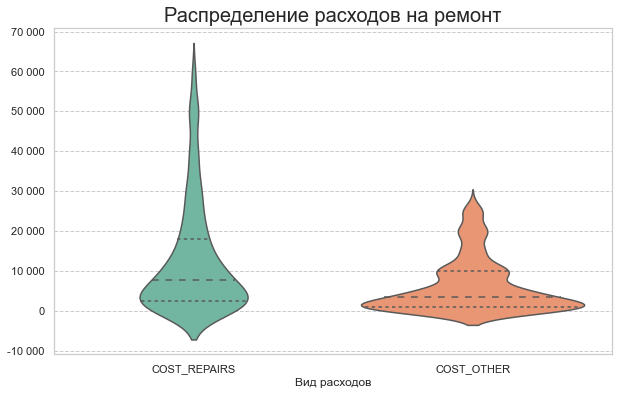

In [29]:
make_violinplot(_df_nums_3[["COST_REPAIRS", "COST_OTHER"]])

##### Усилилась связь COST_OTHER (Остальными расходами) и AOS (временем простоя)
##### Но все равно еще очень и очень слабо, я думаю нет смыла продолжать убирать здесь выбросы

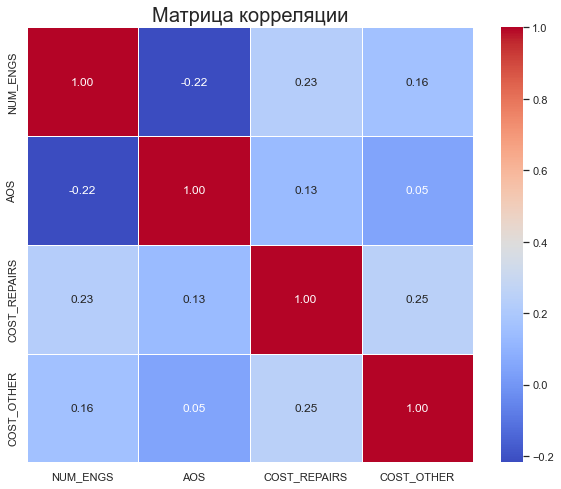

In [30]:
make_correlation_matrix(_df_nums_3)